In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
resenha = pd.read_csv(r'D:\Estudos\Alura\Dataset\IMDB PT\imdb-reviews-pt-br.csv')
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [6]:
treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt, resenha.sentiment, random_state=42)

In [7]:
# regressao_logistica = LogisticRegression()
# regressao_logistica.fit(treino,classe_treino)
# acuracia = regressao_logistica.score(teste, classe_teste)
# print(acuracia)

In [8]:
resenha.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [9]:
resenha['classificacao'] = resenha['sentiment'].replace(['neg','pos'],[0,1])

In [10]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [11]:
# Entendendo como funciona o Bag of words
texto = ['Assisti um filme ótimo', 'Assisti um filme ruim']

vetorizar = CountVectorizer(lowercase = False)
bag_of_words = vetorizar.fit_transform(texto)

In [12]:
vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [13]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [14]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,columns=vetorizar.get_feature_names())

In [15]:
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [16]:
vetorizar = CountVectorizer(lowercase = False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [17]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, resenha.classificacao, random_state=42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino,classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

0.6583097452486858


In [18]:
def classificacao_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase = False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=42)

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino,classe_treino)
    return regressao_logistica.score(teste, classe_teste)

In [19]:
print(classificacao_texto(resenha,'text_pt','classificacao'))

0.6583097452486858


In [20]:
from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha.text_pt])

nuvem_palavras = WordCloud(width=800,height=500, max_font_size=110, collocations=False).generate(todas_palavras)

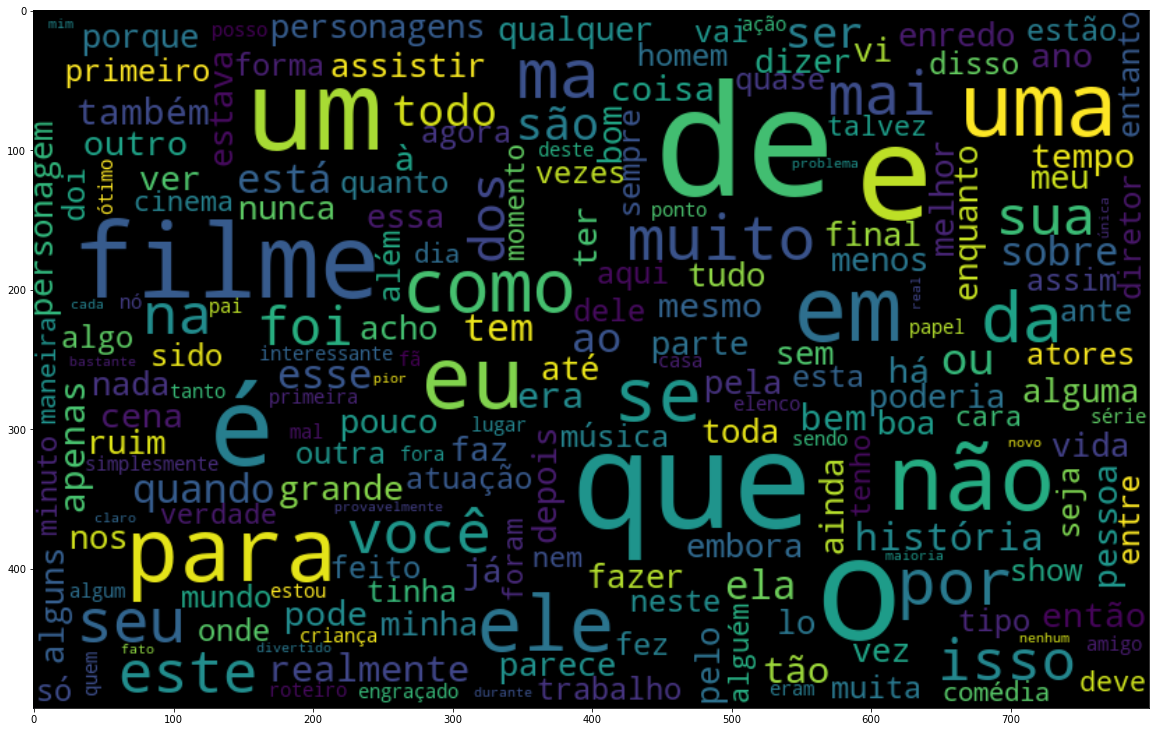

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,14))
plt.imshow(nuvem_palavras, interpolation='bilinear')
# plt.axis('off')
plt.show()

In [22]:
def nuvem_positivo(texto, coluna_texto):
    texto_positivo = texto.query('sentiment == "pos"')
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800,height=500, max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(15,10))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.show()

In [23]:
def nuvem_negativa(texto, coluna_texto):
    texto_negativo = texto.query('sentiment == "neg"')
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800,height=500, max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(15,10))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.show()

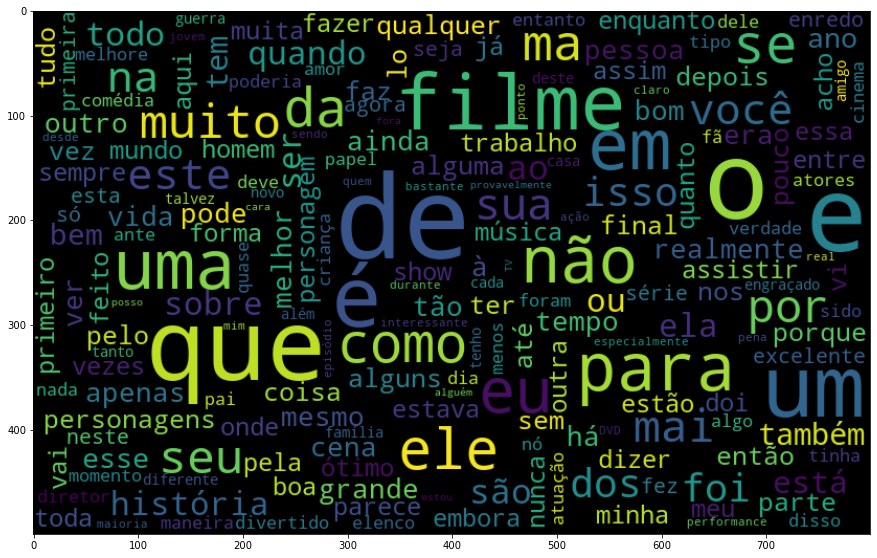

In [24]:
nuvem_positivo(resenha, 'text_pt')

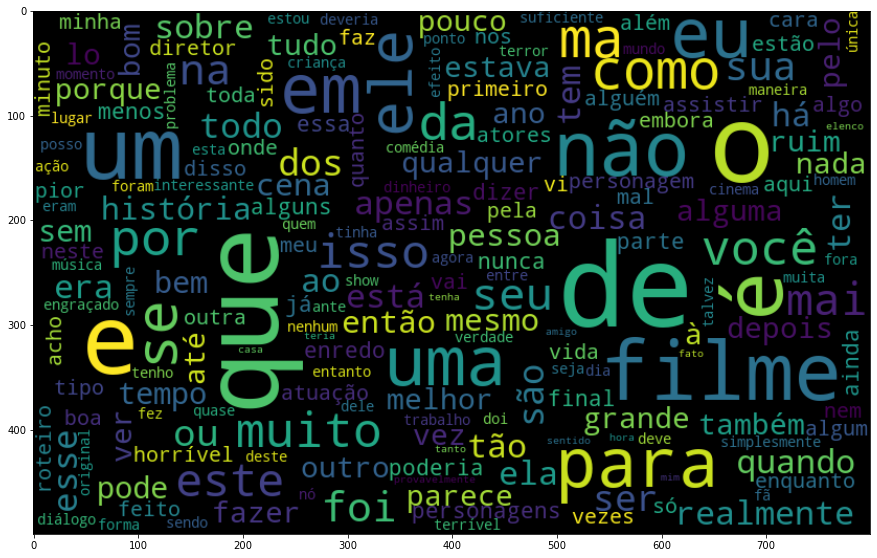

In [25]:
nuvem_negativa(resenha, 'text_pt')

In [26]:
from nltk import tokenize
import nltk

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [27]:
df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),'Frequencia':list(frequencia.values())})

In [28]:
df_frequencia.nlargest(columns='Frequencia',n=10)

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


In [29]:
import seaborn as sns

# def pareto(texto, coluna_texto, quantidade):
#     todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
#     token_frase = token_espaco.tokenize(todas_palavras)
#     frequencia = nltk.FreqDist(token_frase)
#     df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),'Frequencia':list(frequencia.values())})
#     df_frequencia = df_frequencia.nlargest(columns='Frequencia',n=quantidade)

#     plt.figure(figsize=(12,8))
#     ax = sns.barplot(data = df_frequencia, x = 'Palavra', y = 'Frequencia', color = 'gray')
#     ax.set(ylabel = 'Contagem')
#     plt.show()

def pareto(texto, coluna_texto, quantidade):
  todas_palavras = ' '.join([resenha for resenha in texto[coluna_texto]])
  token_espaco = nltk.tokenize.WhitespaceTokenizer()
  token_frase = token_espaco.tokenize(todas_palavras)
  frequencias = nltk.FreqDist(token_frase)
  df_frequencias = pd.DataFrame({'Palavras': list(frequencias.keys()),
                               'Frequencia': list(frequencias.values())})
  df_frequencias = df_frequencias.nlargest(n=quantidade, columns='Frequencia')

  total = df_frequencias['Frequencia'].sum()
  df_frequencias['Porcentagem'] = df_frequencias['Frequencia'].cumsum() / total * 100

  plt.figure(figsize=(12,8))
  ax = sns.barplot(data=df_frequencias, x='Palavras', y='Frequencia', color='gray')
  ax2 = ax.twinx()
  sns.lineplot(data=df_frequencias, x='Palavras', y='Porcentagem', color='red', sort=False, ax=ax2)
  plt.show()

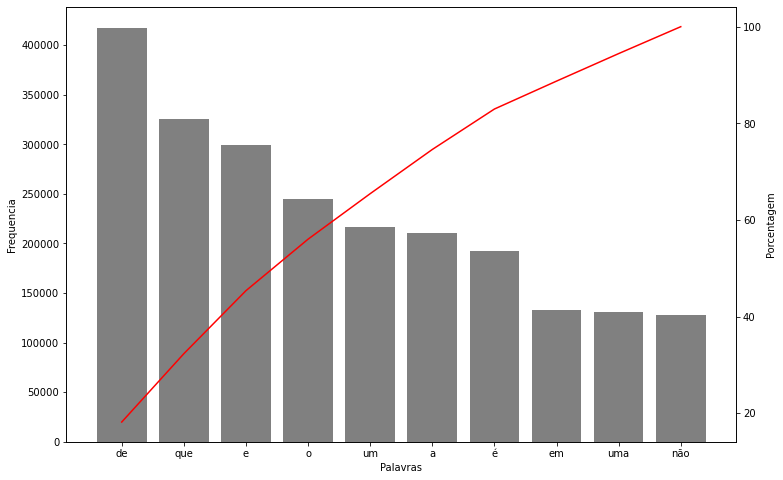

In [30]:
pareto(resenha, 'text_pt', 10)

In [31]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_1'] = frase_processada

In [32]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [33]:
classificacao_texto(resenha, 'tratamento_1','classificacao')

0.6607359482410028

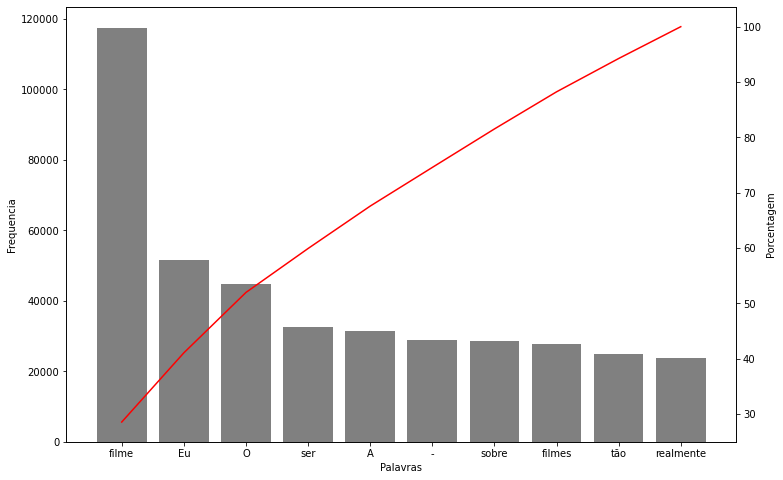

In [34]:
pareto(resenha,'tratamento_1', 10)

In [35]:
from string import punctuation

token_pontuacao = tokenize.WordPunctTokenizer()
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in resenha['tratamento_1']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_2'] = frase_processada

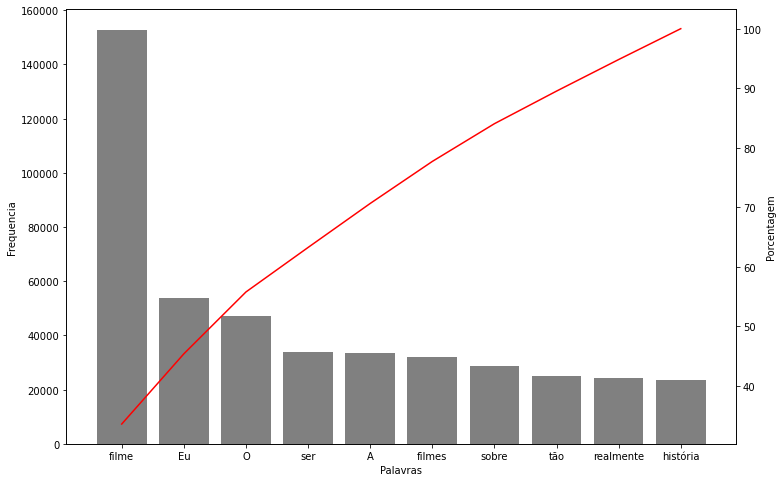

In [36]:
pareto(resenha, 'tratamento_2', 10)

In [37]:
import unidecode

acentos = 'ótimo péssimo não é tão'

teste = unidecode.unidecode(acentos)
print(teste)

otimo pessimo nao e tao


In [38]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha['tratamento_2']]

In [39]:
stopwords = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [40]:
resenha['tratamento_3'] = sem_acentos

frase_processada = list()
for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_3'] = frase_processada

In [41]:
classificacao_texto(resenha, 'tratamento_3', 'classificacao')

0.6810351799433886

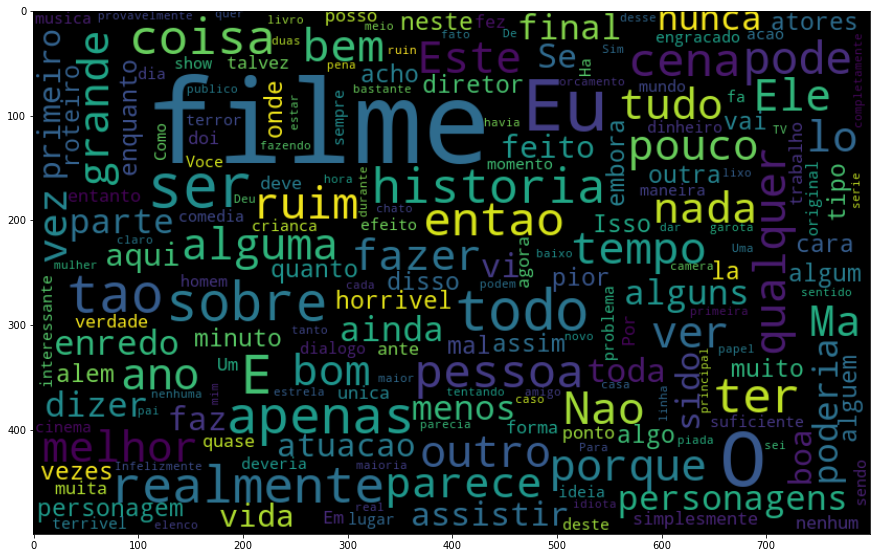

In [42]:
nuvem_negativa(resenha, 'tratamento_3')

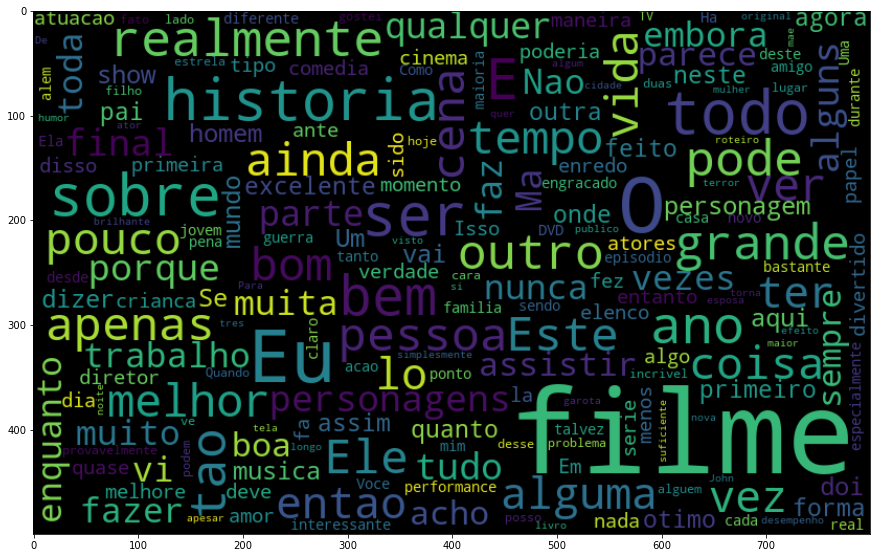

In [43]:
nuvem_positivo(resenha, 'tratamento_3')

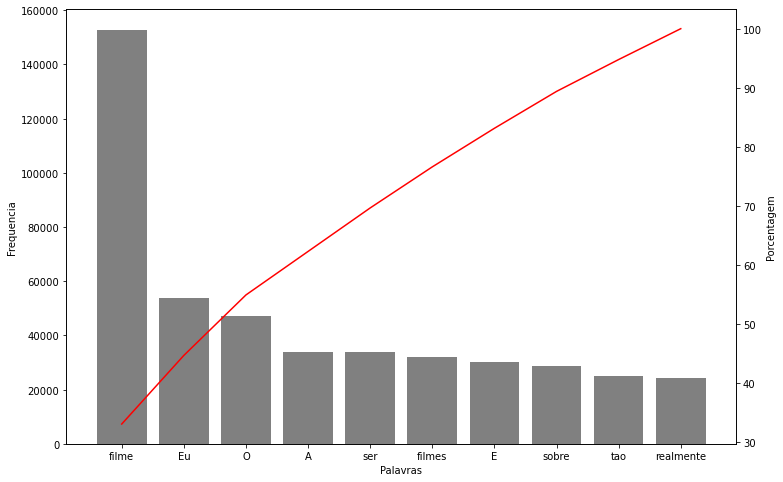

In [44]:
pareto(resenha,'tratamento_3',10)

In [45]:
frase_processada = list()
for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_4'] = frase_processada

In [46]:
classificacao_texto(resenha, 'tratamento_4', 'classificacao')

0.6913061059441973

In [47]:
stemmer = nltk.RSLPStemmer()
frase_processada = list()
for opiniao in resenha['tratamento_4']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        # if palavra not in pontuacao_stopwords:
        nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_5'] = frase_processada

In [48]:
classificacao_texto(resenha, 'tratamento_5', 'classificacao')

0.7001213101496159

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases_teste = ['Assisti um filme ótimo','Assisti um filme péssivo']

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracteristicas = tfidf.fit_transform(frases_teste)
pd.DataFrame(
    caracteristicas.todense(),
    columns=tfidf.get_feature_names()
)


,Assisti,filme,péssivo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [50]:
tfidf_bruto = tfidf.fit_transform(resenha['text_pt'])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto,
                                                            resenha['classificacao'],
                                                            random_state=42)
regressao_logistica.fit(treino, classe_treino)
regressao_logistica.score(teste, classe_teste)

0.6600889607763849

In [51]:
tfidf_tratados = tfidf.fit_transform(resenha['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados,
                                                            resenha['classificacao'],
                                                            random_state=42)
regressao_logistica.fit(treino, classe_treino)
regressao_logistica.score(teste, classe_teste)

0.7003639304488476

In [52]:
from nltk import ngrams

frases = 'Assisti um ótimo filme.'
frase_separada = token_espaco.tokenize(frases)
pares = ngrams(frase_separada,2)
list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [53]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])
treino, teste, classe_treino,classe_teste = train_test_split(vetor_tfidf,
                                                            resenha['classificacao'],
                                                            random_state=42)
regressao_logistica.fit(treino,classe_treino)
regressao_logistica.score(teste, classe_teste)

0.8867771936918722

In [54]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index= tfidf.get_feature_names()
)
pesos.nlargest(10,0)

,0
otim,9.879241
excel,8.975926
perfeit,6.898187
maravilh,6.272574
favorit,5.867189
incri,5.741764
divert,5.438325
brilh,4.829062
ador,4.549729
hoj,4.489993


In [55]:
pesos.nsmallest(10,0)

,0
ruim,-11.691487
pi,-11.371862
horri,-9.642102
terri,-8.362366
chat,-7.480128
nad,-7.420820
parec,-6.621870
nenhum,-6.249077
tent,-5.775731
mal,-5.673391
